# Загрузка Pandas и очистка данных

In [1]:
import pandas as pd
import numpy as np
import math
import datetime
import string
import matplotlib.pyplot as plt
import seaborn as sns 

In [62]:
df = pd.read_csv('main_task_new.csv')

# Функции

In [3]:
"""Удаляет из строки все спец. символы и преобразует в список(list)"""
def str_in_list(str_):
    if str_==1:
        return str_
    
    list_ = []
    str_ = str_.split(',')
    for i in str_:
        for p in string.punctuation:#убирает все спец символы
            if p in i:
                i = i.replace(p, '')
        list_.append(i.strip())
        
    return list_


"""Перевод из списка  в строку"""
def list_in_str(list_):
    return " ".join(list_)


"""Преобразует строку с датой из дд.мм.гггг в гггг.мм.дд"""
def reverse_string(str_):
    return str_[4:]+str_[:2]+str_[2:4]


"""Сравнивает даты из списка и выбирает самую позднюю"""
def last_date(list_):
    last_dat=datetime.datetime.strptime('00010101', '%Y%m%d')
    
    if list_==['']:
        return last_dat

    for str_date in list_:
        str_date=reverse_string(str_date)
        str_date=datetime.datetime.strptime(str_date, '%Y%m%d')
        last_dat=str_date if str_date>last_dat else last_dat
           
    return last_dat


"""Вычитает даты и результат переводит в часы"""
def calculate_date(list_):
    
    if list_==['']:
        return 0 
    elif len(list_)==1:
        return 0
    
    date_1 = list_[0]
    date_2 = list_[1]

    date_1 = reverse_string(date_1)
    date_1 = datetime.datetime.strptime(date_1, '%Y%m%d')
    date_2 = reverse_string(date_2)
    date_2 = datetime.datetime.strptime(date_2, '%Y%m%d')

    delta = date_1 - date_2
    seconds = delta.total_seconds()
    hours =  seconds // 3600
    return abs(hours)


"""Заполняет множество"""
def add_set(list_,set_):
    if list_ == 1:
        return 1
    for i in list_:
        set_.add(i)



"""Запускает алгоритм ML"""
def go_ML_MEA(X,y):
    # Загружаем специальный инструмент для разбивки:
    from sklearn.model_selection import train_test_split
    # Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.
    # Для тестирования мы будем использовать 25% от исходного датасета.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    
    # Импортируем необходимые библиотеки:
    from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
    from sklearn import metrics # инструменты для оценки точности модели
    
    # Создаём модель
    regr = RandomForestRegressor(n_estimators=100)

    # Обучаем модель на тестовом наборе данных
    regr.fit(X_train, y_train)

    # Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
    # Предсказанные значения записываем в переменную y_pred
    y_pred = regr.predict(X_test)
    
    # Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
    # Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
    print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
    plt.rcParams['figure.figsize'] = (10,10)
    feat_importances = pd.Series(regr.feature_importances_, index=X.columns)
    feat_importances.nlargest(10).plot(kind='barh')

In [63]:
# Дублируем Rating для целевой переменной
df_for_y = df['Rating']

### Распределение Rating

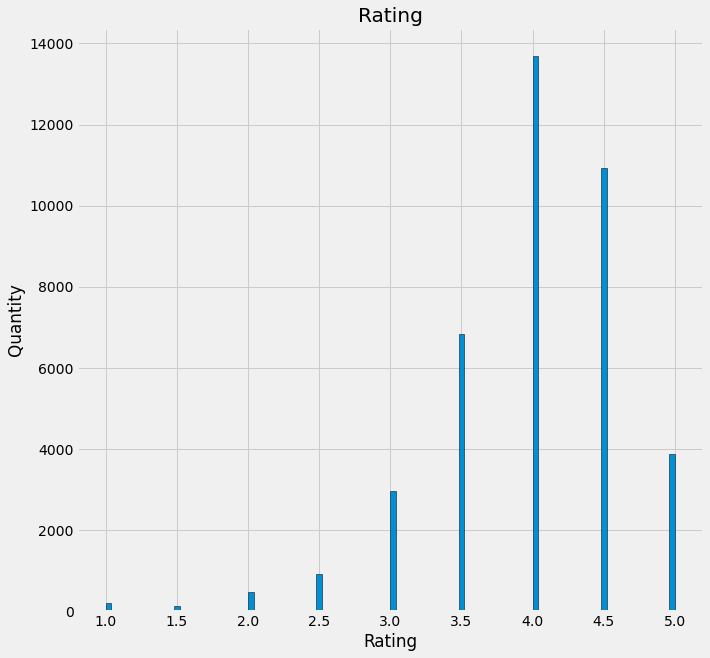

In [35]:
plt.style.use('fivethirtyeight')
plt.hist(df['Rating'].dropna(), bins = 100, edgecolor = 'k');
plt.xlabel('Rating'); plt.ylabel('Quantity');
plt.title('Rating');

## Предобработка данных и добавление новых характеристик

Создание словаря со столицами Европы.<br>
Как правило в столицах уровень жизни выше , а также более развит туризм
из этого можно предположить что и рейтинг рестаранов будет выше<br>
Создаём новый столбец  <b>City</b> - Являеться ли данный город столицей?

In [64]:
str_capitals = "Tirana,Andorra la Vella,Vienna,Minsk,Brussels,Sarajevo,Sofia,Zagreb,Prague,Copenhagen,Tallinn,Helsinki,Paris,Berlin,Athens,Budapest,Reykjavik,Dublin,Rome,Riga,Vaduz,Vilnyus,Skopje,Valletta,Kishinev,Cetinje,Amsterdam,Oslo,Warsaw,Lisbon,Bucharest,Moscow,Belgrade,Bratislava,Ljubljana,Madrid,Stockholm,Bern,Kiev,London"
list_capitals = str_in_list(str_capitals)

def ssr(city,list_capitals):
    for i in list_capitals:
        if i==city:
            return 1
    return 0



df['Capital']=df['City'].apply(lambda x: ssr(x,list_capitals))

Изменения признака ценовой категории с строчного на символьный

In [65]:
# PRICE RANGE, отчистка от nan и изменение данных на числовые
"""заменяет символьные значения на диапозон от 1 до 3 и подставляет вместо nan -> 2"""
def str_in_int_price_range(str_):
    if(str_ !=1) and (str_ !=2) and (str_ !=3):
        if str_=='$':
            return 1
        elif (str_=='$$ - $$$'):
             return 2
        elif (str_=='$$$$'):
            return 3
        else:
            return 2
    return str_


df['Price Range']=df['Price Range'].apply(lambda x: str_in_int_price_range(x))

Замена nan в столбце <b>Cuisine Style</b>  на самую популярную кухню в Европе <b>Vegetarian Friendly</b>

In [66]:
# CUISINE STYLE замена nan на самую популярную кухню 
df['Cuisine Style'] = df['Cuisine Style'].fillna('Vegetarian Friendly')
df['Cuisine Style'] = df['Cuisine Style'].apply(lambda x: len(str_in_list(x)))

Добавление нового признака <b>DAY BETWEEN THE REVIEW</b> - Сколько дней прошло между Reviews


In [67]:
# DAY BETWEEN THE REVIEW создание нового столбца 
"""Вспомогательная функция , убирает выбросы"""
def del_blowout(element,mean):
    if element>365:
        return mean
    return element


# Разбиваем строку  Reviews   
str_date=df['Reviews'].apply(lambda x:str_in_list(x.split('], [')[1]))
df['Reviews_date'] = str_date
df['Day Between The Review'] = df['Reviews_date'].apply(lambda x: (calculate_date(x))/24)

Добавление двух новых признаков:<br>

<b>Ranking / Number of Reviews</b><br>
<b>Number of Reviews / Day Between The Review</b> <br>
    
Первый показывает зависимость количества отзываов от занимаемого места ресторана среди других <br>
Второй показывает сколько времени проходит между отзывами

In [68]:
# Ranking / Number of Reviews
df['Ranking / Number of Reviews']=df['Ranking']/df['Number of Reviews']

# Number of Reviews / Day Between The Review
df['Number of Reviews / Day Between The Review']=df['Number of Reviews']/df['Day Between The Review'].apply(lambda x: 1000 if x==0 else x)

### Алгоритм  Bad of Words
Создает новый столбец  - <b>BAD_OF_WORDS</b><br>
Цель создать числовую характеристику слов которые используют в отзывах в ресторанах с более высоким рейтенгом рейтингом

In [69]:
# Общий словарь
bad_of_words=dict()

# Словарь для слов которые встречаються в Reviews ресторанов  снизким рейтенгом
down_bad_of_words=dict()


"""Создание и запись словаря слов встречающихся в предложениях"""
def add_bad_of_words(list_,bad_of_words):
    for coment in list_[:-2]:
        for word in coment.split(' '):
            word = (word.lower()).strip()
            if word == '':
                continue
            if word not in bad_of_words.keys():
                bad_of_words[word]=1
            else:
                bad_of_words[word]+=1
    
    

"""Поиск слов которые есть в словаре, их возращает их сумму"""  
def search_word_in_reviews(list_,bad_of_words):
    sum_word=0
    for key in bad_of_words:
        str_= (list_in_str(list_[:-2])).lower()
        if key in str_:
            sum_word=str_.count(key) 

    return sum_word           

In [70]:
df['Reviews'] = df['Reviews'].apply(lambda x: str_in_list(x)) 

# Заполняем словарь bad_of_words словами встречающимися в Reviews
df['Reviews'].apply(lambda x: add_bad_of_words(x,bad_of_words))

# Заполняем словарь down_bad_of_words словами встречающимися в Reviews снизким рейтенгом
df[df['Ranking']>4500].Reviews.apply(lambda x: add_bad_of_words(x,down_bad_of_words))


# Ищем совпадение у bad_of_words сdown_bad_of_words и удаляем их из bad_of_words
for i in down_bad_of_words.keys():
    if not(i not in bad_of_words.keys()):
        del bad_of_words[i]


In [71]:
# Отсееваем редко встречающиеся слова 
bad_of_words = {key:val for key, val in bad_of_words.items() if val > 5}
df['bad_of_words'] = df['Reviews'].apply(lambda x: search_word_in_reviews(x,bad_of_words))
print(len(bad_of_words))

179


### Устранение значений <b>nan</b>

In [74]:
# Замена во всех Столбцах с числовыми характеристиками с nan на среднее по стобцу
columns_int = df.select_dtypes('number').columns
mean_=df.loc[:,(columns_int)].mean()

df.fillna(mean_, inplace=True)

### OLS класический Алгоритм
Создает новый столбец  - <b>OLS_RATING</b><br>
Обработка занимает 17 секунд

In [73]:
"""Возращает результат прогноз по рейтенгу """
def ols(el_a,el_b,w_hat):
    return w_hat.iloc[0]+w_hat.iloc[1]*el_a+w_hat.iloc[2]*el_b


Ranking = df['Ranking']
Num_of_Rev = df['Number of Reviews']
ols_y = df[['Rating']]

# Создаем вектор из единиц для коэффициента w_0 и записываем все векторы в СТОЛБЦЫ матрицы признаков А
A = np.column_stack((np.ones(40000), Ranking, Num_of_Rev))
np.set_printoptions(suppress=True)

# вычислим OLS оценку для коэффициентов
w_hat=np.linalg.inv(A.T@A)@A.T@ols_y

df_R_N = df[['Ranking','Number of Reviews']]

df['ols_rating'] = df_R_N.apply(lambda row : ols(row['Ranking'],row['Number of Reviews'],w_hat), axis = 1)

### Создание полиномиальных признаков

In [76]:
dt = df.select_dtypes('number')
for series in dt.columns:
    if series == 'Capital' or series == 'Rating':
        next
    else: 
        df[series]=df[series].apply(lambda x: math.sqrt(x))

### Создание фиктивных(Dummy) переменных CITY

In [77]:
price_range=['City']
df=pd.get_dummies(df,columns=price_range)

In [78]:
df = df.drop(['Restaurant_id','Day Between The Review','Rating','Reviews','URL_TA','ID_TA','Reviews_date'], axis = 1)

In [26]:
df

,Cuisine Style,Ranking,Price Range,Number of Reviews,Capital,Ranking / Number of Reviews,Number of Reviews / Day Between The Review,bad_of_words,ols_rating,City_Amsterdam,...,City_Munich,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich
0,1.732051,74.632433,1.414214,13.928388,1,5.358296,2.175249,1.000000,1.963381,0,...,0,0,0,1,0,0,0,0,0,0
1,1.000000,39.204592,1.414214,3.162278,1,12.397580,0.161796,1.000000,2.038046,0,...,0,0,0,0,0,0,1,0,0,0
2,2.645751,18.788294,1.732051,26.229754,1,0.716297,18.547237,1.000000,2.037319,0,...,0,0,0,0,0,0,0,0,0,0
3,1.000000,58.804762,1.414214,1.732051,1,33.950945,0.054772,0.000000,2.005754,0,...,0,0,0,0,0,0,0,0,0,0
4,1.732051,24.919872,1.414214,9.165151,0,2.718981,0.555719,1.000000,2.051133,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,2.000000,22.360680,1.414214,8.888194,0,2.515773,1.524313,1.414214,2.053301,0,...,0,0,0,0,0,0,0,0,0,0
39996,2.236068,79.630396,1.414214,23.280893,1,3.420418,7.760298,1.000000,1.938814,0,...,0,0,0,1,0,0,0,0,0,0
39997,1.414214,40.644803,1.414214,2.000000,1,20.322401,0.035766,1.000000,2.036297,0,...,0,0,0,0,0,0,1,0,0,0
39998,2.236068,25.317978,1.414214,8.366600,1,3.026077,1.744557,1.414214,2.051222,0,...,0,0,0,0,0,0,0,0,1,0


# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели

In [79]:
list_= df.columns

In [80]:
# Х - данные с информацией о ресторанах, у - целевая переменная (рейтинги ресторанов)
X = df.drop(list_[:-0],axis=1)
y = df_for_y

# Создаём, обучаем и тестируем модель

MAE: 0.20877199999999999


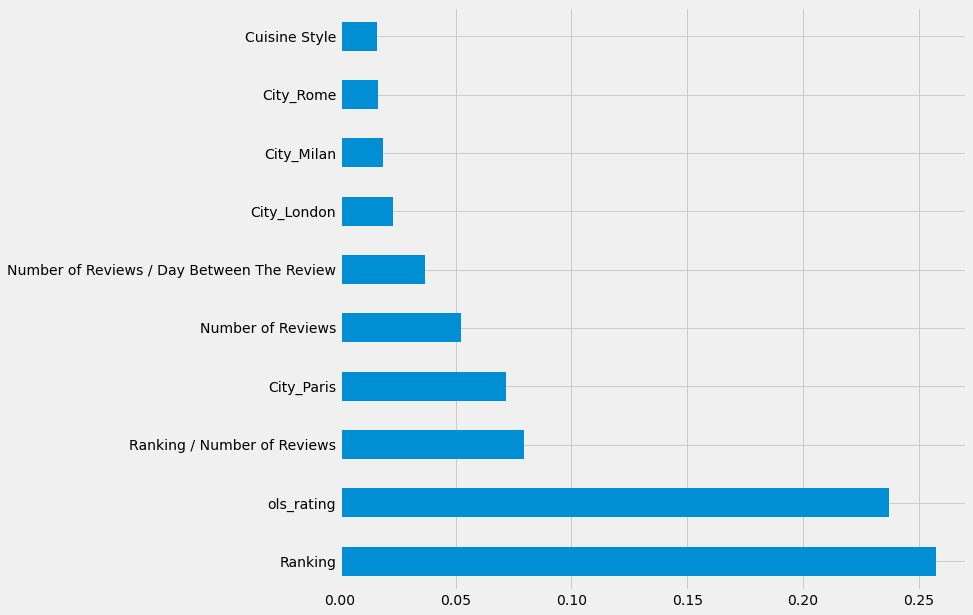

In [82]:
go_ML_MEA(X,y)